# Name: Nishant Himanshu
# Task - 3: Exploratory Data Analysis - Retail

##  ● As a business manager, try to find out the weak areas where you canwork to make more profit and what all business problems you can derive by exploring the data?

# Exploratory Data Analysis - Retail

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
df = df.drop("Country", axis=1)
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## State Wise Analysis

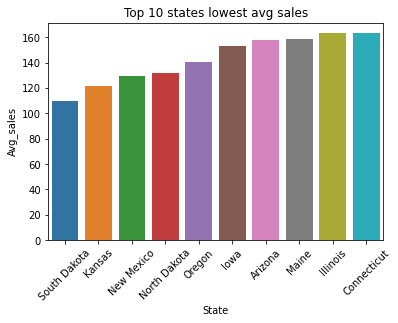

In [79]:
df1 = df.groupby(by="State", axis=0)["Sales"].mean().sort_values(ascending = True)
x = sns.barplot(x= df1.index[:10], y= df1.iloc[:10])
x.set(ylabel = "Avg_sales")
x.set(title="Top 10 states lowest avg sales")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

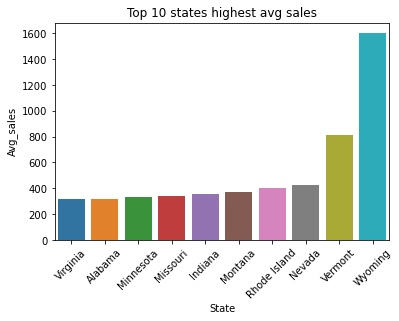

In [80]:
x = sns.barplot(x= df1.index[-10:], y= df1.iloc[-10:])
x.set(ylabel = "Avg_sales")
x.set(title="Top 10 states highest avg sales")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

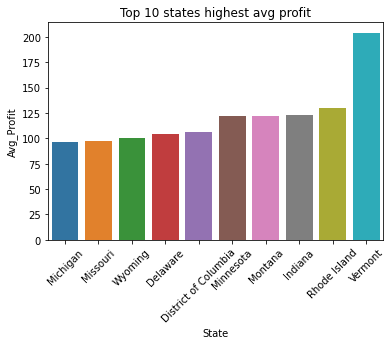

In [81]:
df1 = df.groupby(by="State", axis=0)["Profit"].mean().sort_values(ascending = True)
x = sns.barplot(x= df1.index[-10:], y= df1.iloc[-10:])
x.set(ylabel = "Avg_Profit")
x.set(title="Top 10 states highest avg profit")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

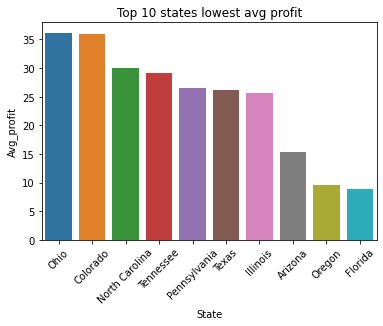

In [82]:
df1 = df1[df1<0].apply(lambda x: -x)
x = sns.barplot(x= df1.index[:10], y= df1.iloc[:10])
x.set(ylabel = "Avg_profit")
x.set(title="Top 10 states lowest avg profit")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

## City wise analysis

In [28]:
df1 = df.groupby(by="City", axis=0)["Sales"].mean().sort_values(ascending = True)
df1

City
Abilene            1.392000
Elyria             1.824000
Jupiter            2.064000
Pensacola          2.214000
Ormond Beach       2.808000
                   ...     
Burbank         1082.386000
Independence    1208.685000
Bellingham      1263.413333
Cheyenne        1603.136000
Jamestown       2354.395000
Name: Sales, Length: 531, dtype: float64

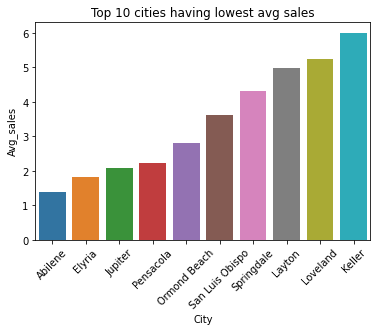

In [35]:
x = sns.barplot(x= df1.index[:10], y= df1.iloc[:10])
x.set(ylabel = "Avg_sales")
x.set(title="Top 10 cities having lowest avg sales")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

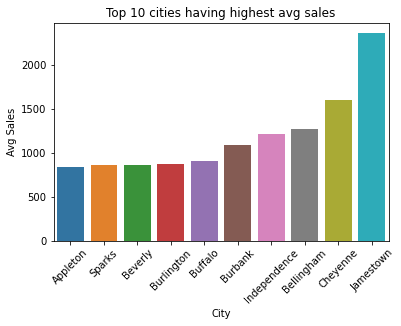

In [46]:
df1 = df.groupby(by="City", axis=0)["Sales"].mean().sort_values()
x = sns.barplot(x= df1.index[-10:], y= df1.iloc[-10:])
x.set(ylabel = "Avg Sales")
x.set(title="Top 10 cities having highest avg sales")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

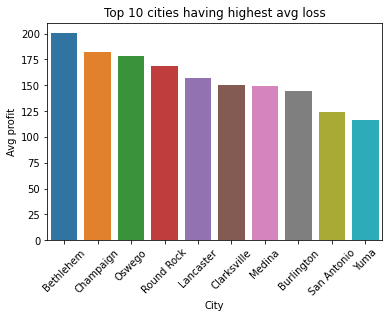

In [42]:
df1 = df.groupby(by="City", axis=0)["Profit"].mean().sort_values()
df1 = df1[df1<0]
df1 = df1.apply(lambda x: -x)
x = sns.barplot(x= df1.index[:10], y= df1.iloc[:10])
x.set(ylabel = "Avg profit")
x.set(title="Top 10 cities having highest avg loss")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

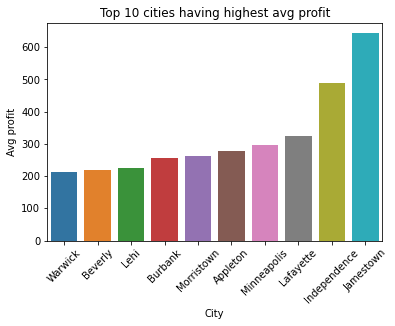

In [45]:
df1 = df.groupby(by="City", axis=0)["Profit"].mean().sort_values()
x = sns.barplot(x= df1.index[-10:], y= df1.iloc[-10:])
x.set(ylabel = "Avg profit")
x.set(title="Top 10 cities having highest avg profit")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

## Category wise Analysis

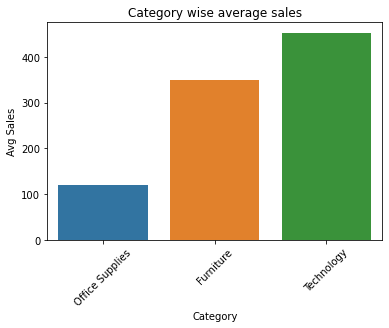

In [53]:
df1 = df.groupby(by="Category", axis=0)["Sales"].mean().sort_values()
x = sns.barplot(x= df1.index, y= df1)
x.set(ylabel = "Avg Sales")
x.set(title="Category wise average sales")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

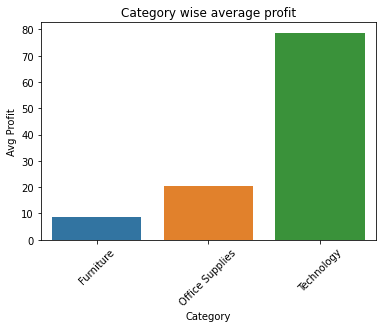

In [55]:
df1 = df.groupby(by="Category", axis=0)["Profit"].mean().sort_values()
x = sns.barplot(x= df1.index, y= df1)
x.set(ylabel = "Avg Profit")
x.set(title="Category wise average profit")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

### SubCategory(Furniture) wise Analysis

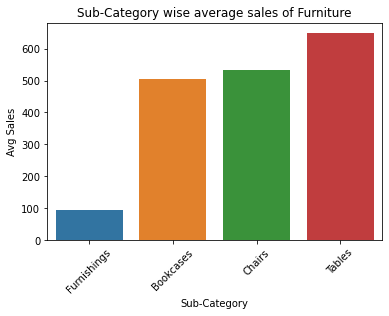

In [57]:
df1= df[df["Category"]=="Furniture"]
df2 = df1.groupby(by="Sub-Category", axis=0)["Sales"].mean().sort_values()
x = sns.barplot(x= df2.index, y= df2)
x.set(ylabel = "Avg Sales")
x.set(title="Sub-Category wise average sales of Furniture")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

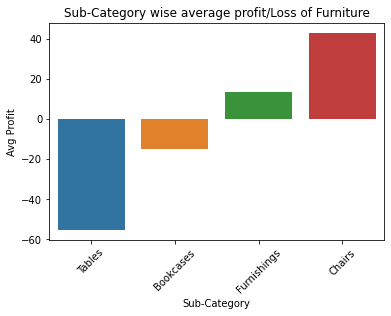

In [65]:
df2 = df1.groupby(by="Sub-Category", axis=0)["Profit"].mean().sort_values()
x = sns.barplot(x=df2.index, y= df2)
x.set(ylabel = "Avg Profit")
x.set(title="Sub-Category wise average profit/Loss of Furniture")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

### Subcategory(Office Suplies) wise analysis

In [66]:
df1= df[df["Category"]=="Office Supplies"]

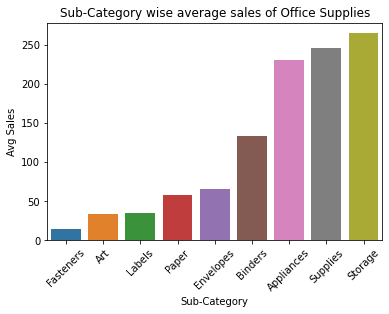

In [68]:
df2 = df1.groupby(by="Sub-Category", axis=0)["Sales"].mean().sort_values()
x = sns.barplot(x= df2.index, y= df2)
x.set(ylabel = "Avg Sales")
x.set(title="Sub-Category wise average sales of Office Supplies")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

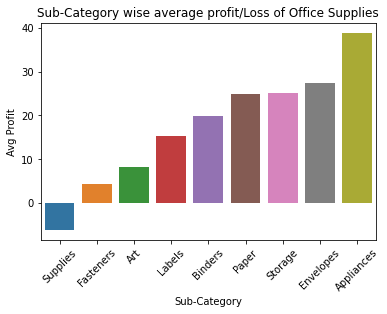

In [69]:
df2 = df1.groupby(by="Sub-Category", axis=0)["Profit"].mean().sort_values()
x = sns.barplot(x=df2.index, y= df2)
x.set(ylabel = "Avg Profit")
x.set(title="Sub-Category wise average profit/Loss of Office Supplies")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

### Subcategory(Technology) wise analysis

In [70]:
df1= df[df["Category"]=="Technology"]

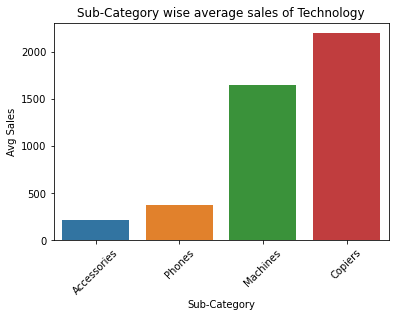

In [71]:
df2 = df1.groupby(by="Sub-Category", axis=0)["Sales"].mean().sort_values()
x = sns.barplot(x= df2.index, y= df2)
x.set(ylabel = "Avg Sales")
x.set(title="Sub-Category wise average sales of Technology")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()

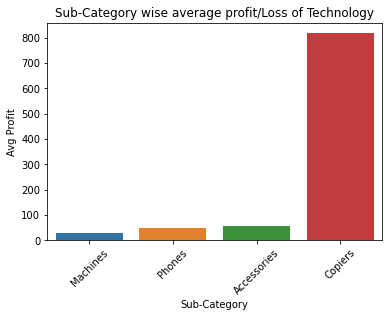

In [72]:
df2 = df1.groupby(by="Sub-Category", axis=0)["Profit"].mean().sort_values()
x = sns.barplot(x=df2.index, y= df2)
x.set(ylabel = "Avg Profit")
x.set(title="Sub-Category wise average profit/Loss of Technology")
for item in x.get_xticklabels():
    item.set_rotation(45)
plt.show()